<a href="https://colab.research.google.com/github/76ilq/Date-Fruit/blob/main/xgboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Reading and Preeprocesing

First let's read the data

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
import cv2
import numpy as np
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("muratkokludataset/date-fruit-datasets")

print("Path to dataset files:", path)

100%|██████████| 408k/408k [00:00<00:00, 1.06MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/muratkokludataset/date-fruit-datasets/versions/1


In [ ]:
# List files and folders
for root, dirs, files in os.walk(path):
    print(f"Root: {root}")
    print(f"Directories: {dirs}")
    print(f"Files: {files}\n")

Root: /root/.cache/kagglehub/datasets/muratkokludataset/date-fruit-datasets/versions/1
Directories: ['Date_Fruit_Datasets']
Files: []

Root: /root/.cache/kagglehub/datasets/muratkokludataset/date-fruit-datasets/versions/1/Date_Fruit_Datasets
Directories: []
Files: ['Date_Fruit_Datasets.xlsx', 'Date_Fruit_Datasets_Citation_Request.txt', 'Date_Fruit_Datasets.arff']



In [ ]:
data = pd.read_excel('/root/.cache/kagglehub/datasets/muratkokludataset/date-fruit-datasets/versions/1/Date_Fruit_Datasets/Date_Fruit_Datasets.xlsx')

In [ ]:
data

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.9080,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,3.2370,2.9574,4.2287,-59191263232,-50714214400,-39922372608,58.7255,54.9554,47.8400,BERHI
1,338136,2085.1440,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-34233065472,-37462601728,-31477794816,50.0259,52.8168,47.8315,BERHI
2,526843,2647.3940,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,3.7516,3.8611,4.7192,-93948354560,-74738221056,-60311207936,65.4772,59.2860,51.9378,BERHI
3,416063,2351.2100,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,5.0401,8.6136,8.2618,-32074307584,-32060925952,-29575010304,43.3900,44.1259,41.1882,BERHI
4,347562,2160.3540,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,2.7016,2.9761,4.4146,-39980974080,-35980042240,-25593278464,52.7743,50.9080,42.6666,BERHI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,255403,1925.3650,691.8453,477.1796,0.7241,570.2536,0.9785,261028,0.7269,1.4499,...,2.2423,2.3704,2.7202,-25296416768,-19168882688,-18473392128,49.0869,43.0422,42.4153,SOGAY
894,365924,2664.8230,855.4633,551.5447,0.7644,682.5752,0.9466,386566,0.6695,1.5510,...,3.4109,3.5805,3.9910,-31605219328,-21945366528,-19277905920,46.8086,39.1046,36.5502,SOGAY
895,254330,1926.7360,747.4943,435.6219,0.8126,569.0545,0.9925,256255,0.7240,1.7159,...,2.2759,2.5090,2.6951,-22242772992,-19594921984,-17592152064,44.1325,40.7986,40.9769,SOGAY
896,238955,1906.2679,716.6485,441.8297,0.7873,551.5859,0.9604,248795,0.6954,1.6220,...,2.6769,2.6874,2.7991,-26048595968,-21299822592,-19809978368,51.2267,45.7162,45.6260,SOGAY


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           898 non-null    int64  
 1   PERIMETER      898 non-null    float64
 2   MAJOR_AXIS     898 non-null    float64
 3   MINOR_AXIS     898 non-null    float64
 4   ECCENTRICITY   898 non-null    float64
 5   EQDIASQ        898 non-null    float64
 6   SOLIDITY       898 non-null    float64
 7   CONVEX_AREA    898 non-null    int64  
 8   EXTENT         898 non-null    float64
 9   ASPECT_RATIO   898 non-null    float64
 10  ROUNDNESS      898 non-null    float64
 11  COMPACTNESS    898 non-null    float64
 12  SHAPEFACTOR_1  898 non-null    float64
 13  SHAPEFACTOR_2  898 non-null    float64
 14  SHAPEFACTOR_3  898 non-null    float64
 15  SHAPEFACTOR_4  898 non-null    float64
 16  MeanRR         898 non-null    float64
 17  MeanRG         898 non-null    float64
 18  MeanRB    

In [ ]:
data['Class'].unique()

array(['BERHI', 'DEGLET', 'DOKOL', 'IRAQI', 'ROTANA', 'SAFAVI', 'SOGAY'],
      dtype=object)

In [ ]:
X = data.drop(['Class'],axis=1)
y = data['Class']

In [ ]:
X


,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,SkewRB,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB
0,422163,2378.9080,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,0.6019,3.2370,2.9574,4.2287,-59191263232,-50714214400,-39922372608,58.7255,54.9554,47.8400
1,338136,2085.1440,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,0.4134,2.6228,2.6350,3.1704,-34233065472,-37462601728,-31477794816,50.0259,52.8168,47.8315
2,526843,2647.3940,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,0.9183,3.7516,3.8611,4.7192,-93948354560,-74738221056,-60311207936,65.4772,59.2860,51.9378
3,416063,2351.2100,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,1.8028,5.0401,8.6136,8.2618,-32074307584,-32060925952,-29575010304,43.3900,44.1259,41.1882
4,347562,2160.3540,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,0.8865,2.7016,2.9761,4.4146,-39980974080,-35980042240,-25593278464,52.7743,50.9080,42.6666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,255403,1925.3650,691.8453,477.1796,0.7241,570.2536,0.9785,261028,0.7269,1.4499,...,-0.1398,2.2423,2.3704,2.7202,-25296416768,-19168882688,-18473392128,49.0869,43.0422,42.4153
894,365924,2664.8230,855.4633,551.5447,0.7644,682.5752,0.9466,386566,0.6695,1.5510,...,0.5611,3.4109,3.5805,3.9910,-31605219328,-21945366528,-19277905920,46.8086,39.1046,36.5502
895,254330,1926.7360,747.4943,435.6219,0.8126,569.0545,0.9925,256255,0.7240,1.7159,...,0.2665,2.2759,2.5090,2.6951,-22242772992,-19594921984,-17592152064,44.1325,40.7986,40.9769
896,238955,1906.2679,716.6485,441.8297,0.7873,551.5859,0.9604,248795,0.6954,1.6220,...,0.5325,2.6769,2.6874,2.7991,-26048595968,-21299822592,-19809978368,51.2267,45.7162,45.6260


In [ ]:
y

,Class
0,BERHI
1,BERHI
2,BERHI
3,BERHI
4,BERHI
...,...
893,SOGAY
894,SOGAY
895,SOGAY
896,SOGAY


Data Transformation

In [ ]:
def transformation(X,y):
    X_scaler = minmax_scale(X)
    X = pd.DataFrame(X_scaler)

    class_encoder = LabelEncoder()
    y = class_encoder.fit_transform(y)
    return X,y

X,y = transformation(X,y)
print(X)
print(y)

           0         1         2         3         4         5         6   \
0    0.772274  0.772079  0.565604  0.841941  0.446429  0.871512  0.983209   
1    0.617835  0.617480  0.436904  0.775906  0.342186  0.773229  1.000000   
2    0.964674  0.913374  0.681733  0.933143  0.464896  0.981104  0.992537   
3    0.761063  0.757502  0.554467  0.841456  0.430098  0.864727  0.983831   
4    0.635159  0.657060  0.482240  0.759716  0.460470  0.784821  0.958955   
..        ...       ...       ...       ...       ...       ...       ...   
893  0.465773  0.533393  0.400815  0.621454  0.578907  0.663606  0.882463   
894  0.668908  0.922547  0.585486  0.718768  0.640415  0.806960  0.684080   
895  0.463801  0.534115  0.463625  0.567071  0.713980  0.662076  0.969527   
896  0.435542  0.523343  0.428810  0.575194  0.675366  0.639781  0.769900   
897  0.628230  0.724906  0.549798  0.696824  0.634768  0.780204  0.879975   

           7         8         9   ...        24        25        26  \
0  

Splitting the data train data,test data, validation data

In [ ]:
def split_data(X,y,train_size,random_state):
    X_train,X_test,y_train,y_test = train_test_split(X, y, train_size = train_size, random_state=random_state)
    return X_train,X_test,y_train,y_test

X_train,X_temp,y_train,y_temp = split_data(X,y,0.8,42)
X_val,X_test,y_val,y_test = split_data(X_temp,y_temp,0.5,42)
print(f"Length of the dataset: {len(X)}")
print(f"Length of the training dataset: {len(X_train)}")
print(f"Length of the validation dataset: {len(X_val)}")
print(f"Length of the test dataset: {len(X_test)}")

Length of the dataset: 898
Length of the training dataset: 718
Length of the validation dataset: 90
Length of the test dataset: 90


# XGBoost

In [ ]:
!pip install xgboost

In [ ]:
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt

### Test 1

Accuracy: 0.9111
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.62      0.77         8
           1       0.77      0.91      0.83        11
           2       1.00      0.90      0.95        21
           3       0.78      1.00      0.88         7
           4       1.00      0.94      0.97        17
           5       1.00      1.00      1.00        14
           6       0.79      0.92      0.85        12

    accuracy                           0.91        90
   macro avg       0.90      0.90      0.89        90
weighted avg       0.93      0.91      0.91        90

F1 Score : 0.9115
Precision : 0.9259
Recall : 0.9111


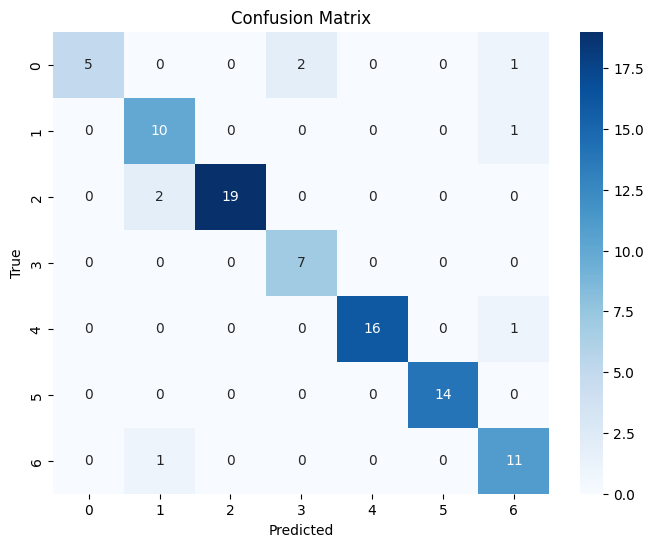

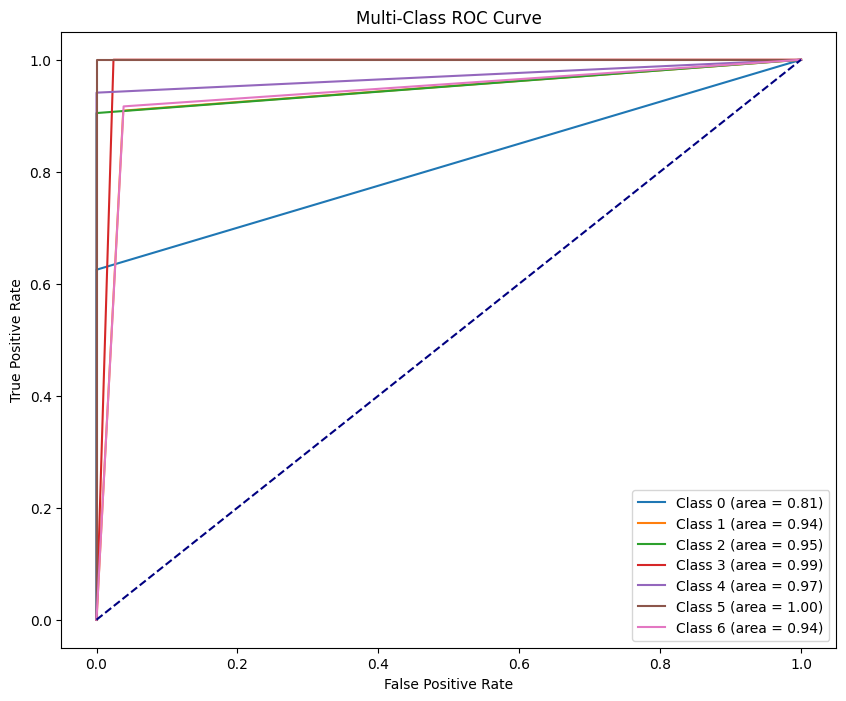

In [ ]:
from xgboost import XGBClassifier

# Initialize the model for multi-class classification
model = XGBClassifier(objective='multi:softmax', num_class=7, max_depth=6, learning_rate=0.1, n_estimators=100)

# Train the model
model.fit(X_train, y_train)

# Predict using the trained model
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

class_report = classification_report(y_test, y_pred)
print('Classification Report:\n', class_report)

# F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1 Score : {f1:.4f}')

# Precision
precision = precision_score(y_test, y_pred, average='weighted')
print(f'Precision : {precision:.4f}')

# Recall
recall = recall_score(y_test, y_pred, average='weighted')
print(f'Recall : {recall:.4f}')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize using Seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the output for multi-class ROC curve
y_test_bin = label_binarize(y_test, classes=model.classes_)
y_pred_bin = label_binarize(y_pred, classes=model.classes_)

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(len(model.classes_)):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {model.classes_[i]} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve')
plt.legend(loc='lower right')
plt.show()

### Test 2

Accuracy: 0.9111
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.62      0.77         8
           1       0.75      0.82      0.78        11
           2       0.95      0.90      0.93        21
           3       0.78      1.00      0.88         7
           4       1.00      1.00      1.00        17
           5       1.00      1.00      1.00        14
           6       0.85      0.92      0.88        12

    accuracy                           0.91        90
   macro avg       0.90      0.89      0.89        90
weighted avg       0.92      0.91      0.91        90

F1 Score : 0.9101
Precision : 0.9200
Recall : 0.9111


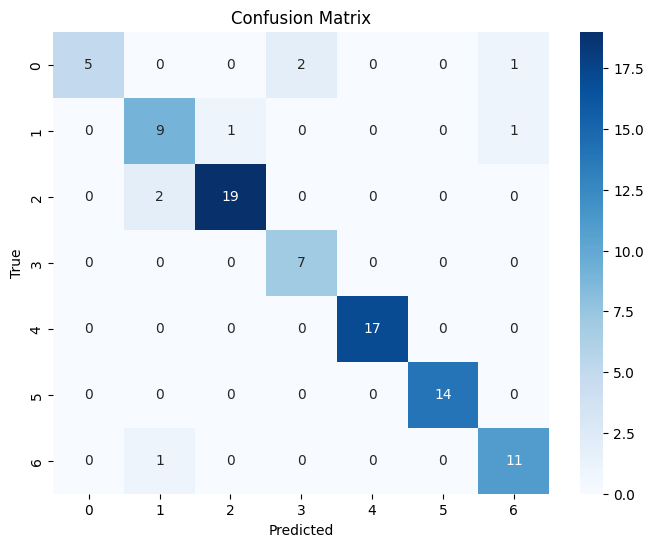

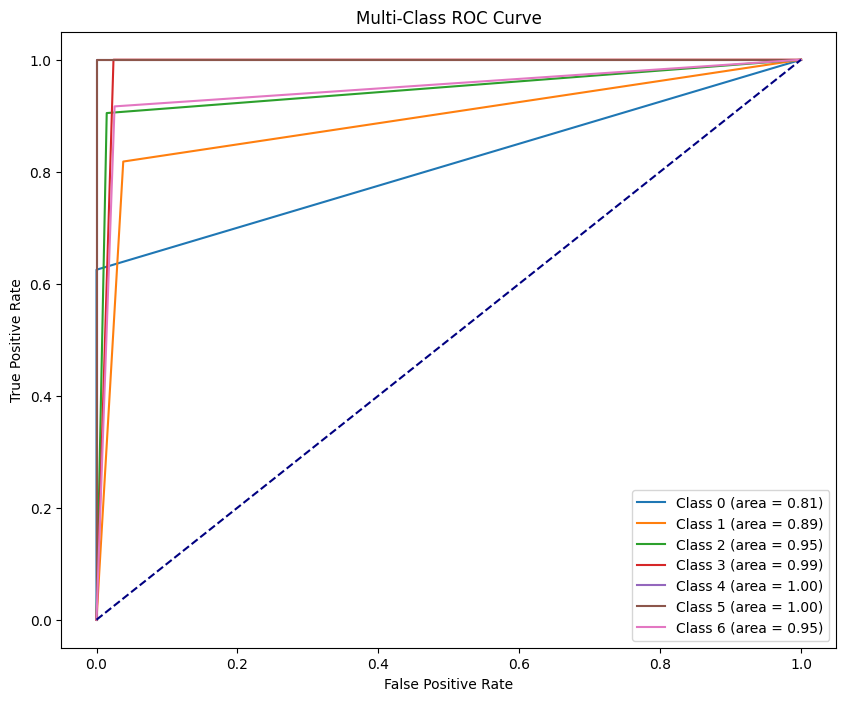

In [ ]:
from xgboost import XGBClassifier

# Initialize the model for multi-class classification
model = XGBClassifier(
    objective='multi:softmax',
    num_class=7,
    max_depth=9,
    learning_rate=0.05,  # Lower learning rate
    n_estimators=200     # More boosting rounds
)

# Train the model
model.fit(X_train, y_train)

# Predict using the trained model
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

class_report = classification_report(y_test, y_pred)
print('Classification Report:\n', class_report)

# F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1 Score : {f1:.4f}')

# Precision
precision = precision_score(y_test, y_pred, average='weighted')
print(f'Precision : {precision:.4f}')

# Recall
recall = recall_score(y_test, y_pred, average='weighted')
print(f'Recall : {recall:.4f}')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize using Seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the output for multi-class ROC curve
y_test_bin = label_binarize(y_test, classes=model.classes_)
y_pred_bin = label_binarize(y_pred, classes=model.classes_)

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(len(model.classes_)):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {model.classes_[i]} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve')
plt.legend(loc='lower right')
plt.show()

### Test3

Accuracy: 0.9333
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.75      0.86         8
           1       0.77      0.91      0.83        11
           2       1.00      0.90      0.95        21
           3       0.78      1.00      0.88         7
           4       1.00      1.00      1.00        17
           5       1.00      1.00      1.00        14
           6       0.92      0.92      0.92        12

    accuracy                           0.93        90
   macro avg       0.92      0.93      0.92        90
weighted avg       0.94      0.93      0.93        90

F1 Score : 0.9344
Precision : 0.9434
Recall : 0.9333


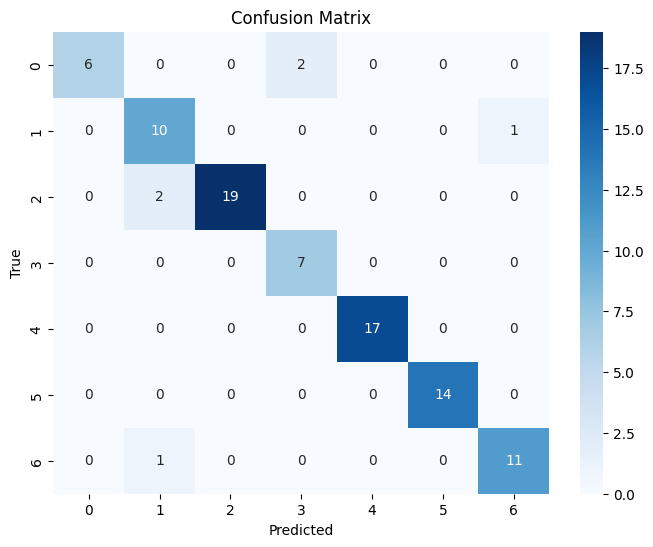

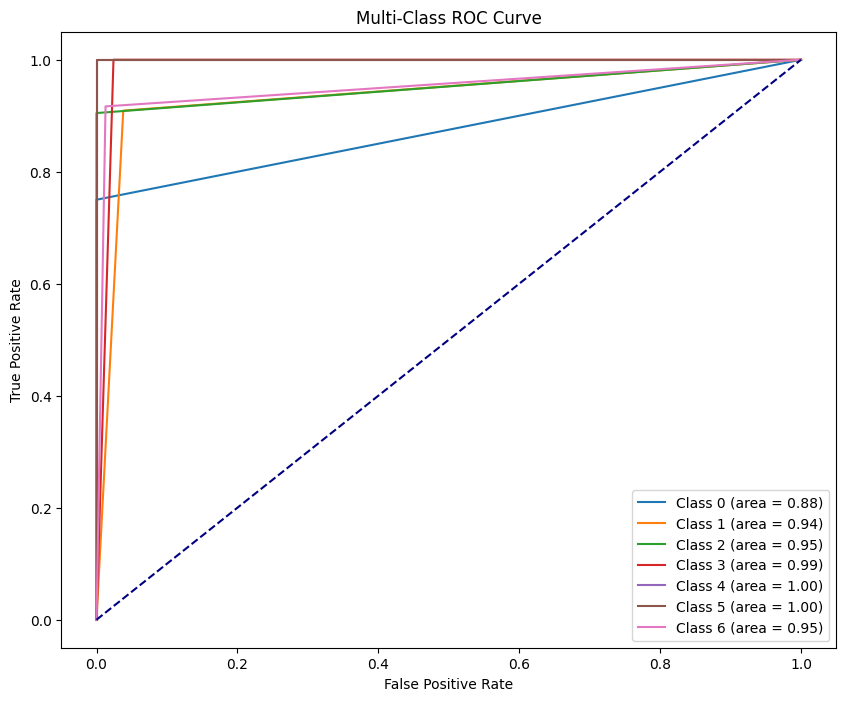

In [ ]:
from xgboost import XGBClassifier

# Initialize the model for multi-class classification
model = XGBClassifier(
    objective='multi:softmax',
    num_class=7,
    max_depth=9,
    learning_rate=0.1,
    n_estimators=100,
    subsample=0.8,       # Use 80% of training data in each boosting round
    colsample_bytree=0.8 # Use 80% of features in each boosting round
)

# Train the model
model.fit(X_train, y_train)

# Predict using the trained model
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

class_report = classification_report(y_test, y_pred)
print('Classification Report:\n', class_report)

# F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1 Score : {f1:.4f}')

# Precision
precision = precision_score(y_test, y_pred, average='weighted')
print(f'Precision : {precision:.4f}')

# Recall
recall = recall_score(y_test, y_pred, average='weighted')
print(f'Recall : {recall:.4f}')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize using Seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the output for multi-class ROC curve
y_test_bin = label_binarize(y_test, classes=model.classes_)
y_pred_bin = label_binarize(y_pred, classes=model.classes_)

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(len(model.classes_)):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {model.classes_[i]} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve')
plt.legend(loc='lower right')
plt.show()
